# Star Wars Survey Responses 
## Cleaning and Exploration with Python

Nine years ago the team at FiveThirtyEight ran a Star Wars survey, collecting 1186 responses. Our goal is to clean and explore this survey data to understand fans' film rankings and viewership.

## Load Libraries, Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = None

star_wars = pd.read_csv('star_wars.csv',encoding='ISO-8859-1')
print(star_wars.shape[0])

1186


In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Mapping Yes/No Columns

We are going to remaster a few Yes/No columns so that they read True/False instead. Here are the questions we will transform via mapping:
* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

In [4]:
## create map
yes_no = {
    'Yes':True,
    'No':False
}

## map two questions
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [5]:
## test results
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
## test results
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

There is a series of six checkbox questions asking respondents have they have seen a specific Star Wars film. If the respondent checked the box, the positive result displays as the title of the film in our dataset. If not, the result displays as NaN.

We need to convert these to True/False values via mapping and rename the columns.

#### Columns Involved
* Which of the following Star Wars films have you seen? Please select all that apply.
* Unnamed: 4-8

In [7]:
## create map
seen = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

In [8]:
## map relevant columns
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(seen)

In [9]:
## check work
star_wars.iloc[:,3].value_counts()

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In [10]:
## rename columns
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen1',
    'Unnamed: 4':'seen2',
    'Unnamed: 5':'seen3',
    'Unnamed: 6':'seen4',
    'Unnamed: 7':'seen5',
    'Unnamed: 8':'seen6'
})

In [11]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen1,seen2,seen3,seen4,seen5,seen6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


## Cleaning Rank Columns

In the next six columns, respondents rank the Star Wars films 1-6, 1 being favorite and 6 being least favorite. Answers may also include NaN.

We need to convert these columns to a numeric type and also rename them.

In [12]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'Rank1',
    'Unnamed: 10':'Rank2',
    'Unnamed: 11':'Rank3',
    'Unnamed: 12':'Rank4',
    'Unnamed: 13':'Rank5',
    'Unnamed: 14':'Rank6'
})

## Generating Film Titles

We need to generate a list of film titles to use in our upcoming graphs.

In [14]:
film_titles = []

for i in range(1,7):
    film = 'Episode '+str(i)
    film_titles.append(film)
    
film_titles

['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6']

## How do the Films Rank?

Let's see how the respondents ranked each film.

In [57]:
film_rank = star_wars[star_wars.columns[9:15]].mean()
film_rank = pd.DataFrame(film_rank)
film_rank = film_rank.reset_index()
film_rank.columns = ['film','avg ranking']

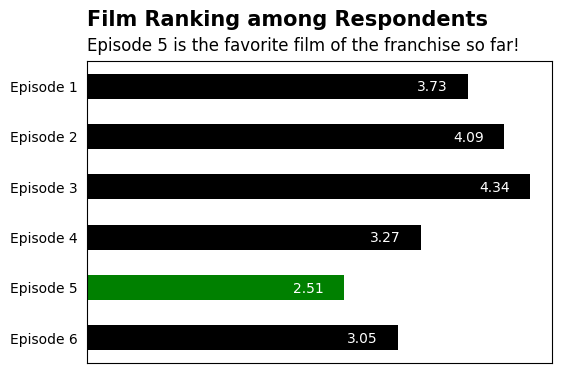

In [60]:
## color map
rank_color = ['green' if i == film_rank['avg ranking'].min() else 'black' for i in film_rank['avg ranking']]

## plot
ax0 = film_rank.plot.barh('film','avg ranking',color=rank_color)

## titles
ax0.text(0,-1.2,'Film Ranking among Respondents',size=15, weight='bold')
ax0.text(0,-.7,'Episode 5 is the favorite film of the franchise so far!',size=12)

## fix axis
ax0.invert_yaxis()

## axis and ticks
ax0.set_yticklabels(film_titles)
ax0.tick_params(
        left=False,
        bottom=False,
        labelbottom=False
)
plt.ylabel('')
plt.xlabel('')
ax0.get_legend().remove()

## bar labels
for i,v in enumerate(film_rank['avg ranking']):
    ax0.text(v-.5,i+.1,round(v,2),color='white')

It isn't surprising to see the first three episodes ranked worse than the original three, with Episode III ranking the worst. This actually means the first three episodes are enjoyed less than the original three. It seems that Episode V is the fan favorite while Episode III is the least favorite.

## Finding the Most Viewed Movie

We will sum up the seen columns, which we previously re-mapped to boolean values, to get an idea of fan viewership for each movie. Lucky for us, sums count instances of True and ignore the False.

In [56]:
views = star_wars[star_wars.columns[3:9]].sum()
views = pd.DataFrame(views)
views = views.reset_index()
views.columns = ['film','views']

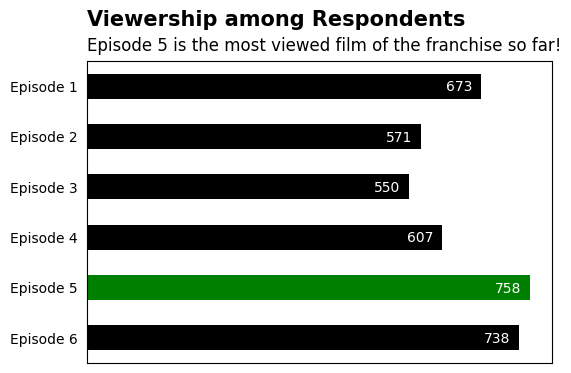

In [58]:
## color map for viz
color_views = ['green' if i == views['views'].max() else 'black' for i in views['views']]

## plot
ax = views.plot.barh('film','views',color=color_views)

## title & subtitle
ax.text(0,-1.2,'Viewership among Respondents',size=15, weight='bold')
ax.text(0,-.7,'Episode 5 is the most viewed film of the franchise so far!',size=12)

## fix axis
ax.invert_yaxis()

## ticks and labels
ax.set_yticklabels(film_titles)
ax.tick_params(
        left=False,
        bottom=False,
        labelbottom=False
)
plt.ylabel('')
plt.xlabel('')
ax.get_legend().remove()


## label bars
for i,v in enumerate(views['views']):
    ax.text(v-60,i+.1,v,color='white')


Episode V, the most viewed film, is also the most popular. Episode III, the least popular film, is also the least viewed. It is interesting that more people have seen Episodes V and VI than Episode IV.

## What do Trekkies think?

Let's segment the data by Star Trek fanship using the  following question:
* Do you consider yourself to be a fan of the Star Trek franchise?

For reference, there are fewer trekkies than there are non-trekkies.

In [20]:
trekkies = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='Yes']
normies = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=='No']

In [21]:
print('There are',trekkies.shape[0],'trekkies,',round(trekkies.shape[0]/1186*100,2),'% of respondents.')
print('There are',normies.shape[0],'non-trekkies,',round(normies.shape[0]/1186*100,2),'% of respondents.')
print('The remaining respondents must not have answered.')

There are 427 trekkies, 36.0 % of respondents.
There are 641 non-trekkies, 54.05 % of respondents.
The remaining respondents must not have answered.


### Movie Ranking

Let's compare movie rankings between trekkies and non-trekkies!

In [55]:
trekkie_rank = trekkies[trekkies.columns[9:15]].mean()
trekkie_rank = pd.DataFrame(trekkie_rank)
trekkie_rank = trekkie_rank.reset_index()
trekkie_rank.columns = ['film','avg ranking']

In [54]:
normie_rank = normies[normies.columns[9:15]].mean()
normie_rank = pd.DataFrame(normie_rank)
normie_rank = normie_rank.reset_index()
normie_rank.columns = ['film','avg ranking']

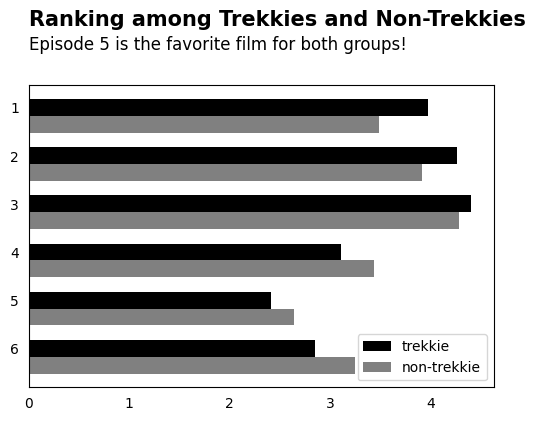

In [31]:
index = np.arange(1,7)

## plot
fig, ax = plt.subplots()
trek = ax.barh(index,trekkie_rank['avg ranking'],.35,color='black',label='trekkie')
norm = ax.barh(index+.35,normie_rank['avg ranking'],.35,color='grey',label='non-trekkie')

## titles
ax.text(0,-.7,'Ranking among Trekkies and Non-Trekkies',size=15, weight='bold')
ax.text(0,-.2,'Episode 5 is the favorite film for both groups!',size=12)

## set axis and tick labels
ax.invert_yaxis()
ax.set_yticklabels([0,1,2,3,4,5,6])
ax.tick_params(
    left=False,
    bottom=False)
plt.ylabel('')
plt.xlabel('')
plt.legend()
plt.show()


Trekkies appear to love and hate a lot harder than non-trekkies. Perhaps their opinions are more unified and non-trekkies are more varied. While trekkies seem to rank more on par with one another, there is no other difference in ranking between the two groups! All movies have approximately the same position in rank.

## Film Viewership

Now we will compare film viewership between the two groups.

In [53]:
trek_view = trekkies[trekkies.columns[3:9]].sum()
trek_view = pd.DataFrame(trek_view)
trek_view = trek_view.reset_index()
trek_view.columns = ['film','views']

In [52]:
norm_view = normies[normies.columns[3:9]].sum()
norm_view = norm_view.reset_index()
norm_view.columns = ['film','views']

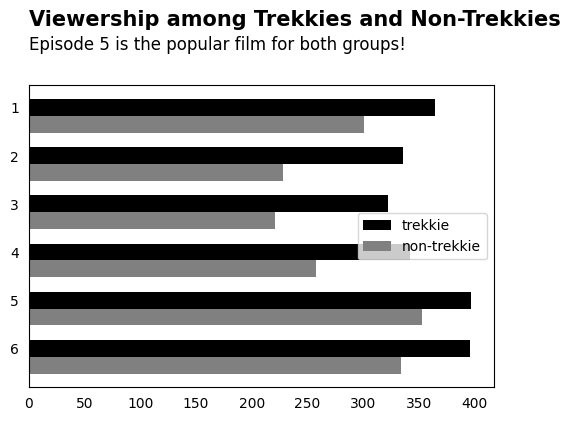

In [48]:
index = np.arange(1,7)

## plot
fig, ax = plt.subplots()
trek = ax.barh(index,trek_view['views'],.35,color='black',label='trekkie')
norm = ax.barh(index+.35,norm_view['views'],.35,color='grey',label='non-trekkie')

## titles
ax.text(0,-.7,'Viewership among Trekkies and Non-Trekkies',size=15, weight='bold')
ax.text(0,-.2,'Episode 5 is the popular film for both groups!',size=12)

## set axis and tick labels
ax.invert_yaxis()
ax.set_yticklabels([0,1,2,3,4,5,6])
ax.tick_params(
    left=False,
    bottom=False)
plt.ylabel('')
plt.xlabel('')
plt.legend()
plt.show()


By far and away more trekkies have watched each film than non-trekkies. We compare percentages between the populations for simplicity and see that there's a 35-40% difference between the two groups for each movie.

## Conclusions

Trekkies are a passionate bunch and tend to rank films more similarly within the group than non-trekkies. Not only that, but they're more likely to have watched each film covered by the survey as well. Apparently trekkies nerd harder than everyone else.

Overall, Episode III is the least favorite film among all fans - Trekkies or not. And Episode V is the favorite among fans. This also does not change when re-assessing ranking by trek vs. non trek.

These results support what many of us may know annecdotally - that the first three episodes don't compare to the original three, especially Episode III.